# 1. Creating Circuit for Superdense Coding

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

def SDC_circuit(msg) :
    circ= QuantumCircuit(2)
    circ.h(0)
    circ.cx(0,1)
    circ.barrier(range(2))

    if msg[0]=="1" :
        circ.z(0)
    if msg[1]=="1" : 
         circ.x(0)

    circ.barrier(range(2))
    circ.cx(0,1)
    circ.h(0)

    meas = QuantumCircuit(2,2)
    meas.barrier(range(2))
    meas.measure(range(2), range(2))


    qc = meas.compose(circ, range(2), front=True)

    return qc

Example Circuit:


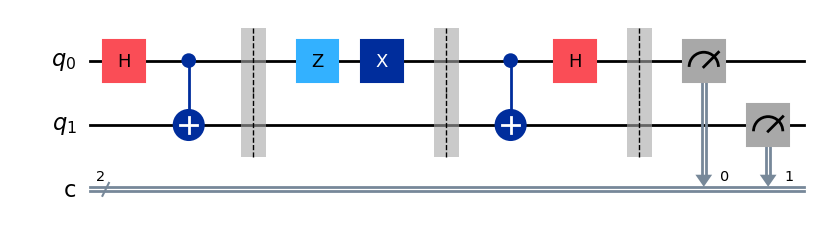

In [2]:
SDC_circuit('11').draw('mpl')

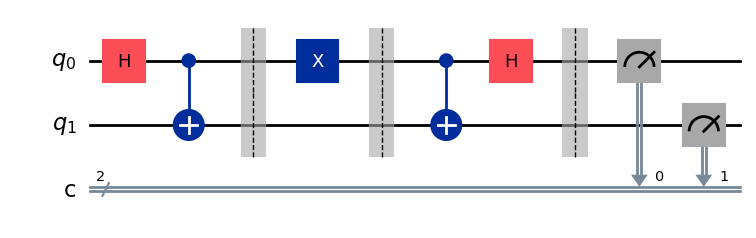

In [3]:
SDC_circuit('01').draw('mpl')

# 2.Running on Aer Simulator:


{'10': 1024}


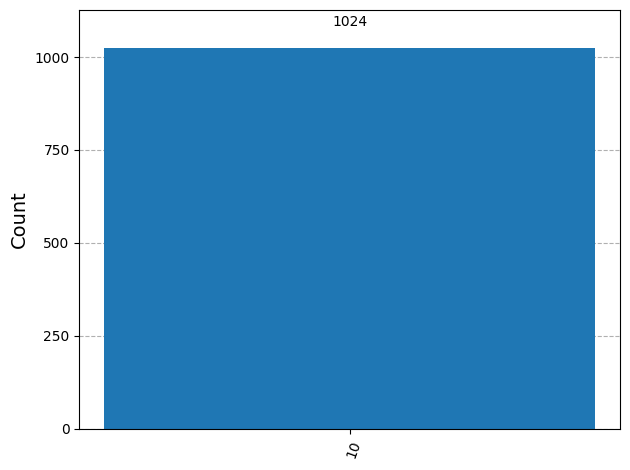

In [10]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

backend = AerSimulator()
qc_compiled = transpile(SDC_circuit('01'), backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)
plot_histogram(counts)

We send the correct message all 1024 times!

# 3.Utopian Future


## Noise-Free AerSimulator

In [5]:
def word_to_binary(word):
    binary = ''.join(format(ord(c), '08b') for c in word)
    return binary 
# Remember for each letter in your word it will add 8 more bits so choose a relatively shorter word ~12 letters or less

In [6]:
def binary_to_word(binary_str):
    # Pad with zeros if length not multiple of 8
    padded = binary_str.ljust((len(binary_str) + 7) // 8 * 8, '0')
    return ''.join(chr(int(padded[i:i+8], 2)) for i in range(0, len(padded), 8))

In [7]:
message = 'quantumcomp'

binary = word_to_binary(message)

output = ''

while len(binary) >=2:
    msg = binary[:2]
    # print(msg)
    backend = AerSimulator()
    new_qc_compiled = transpile(SDC_circuit(msg), backend)
    new_job_sim = backend.run(new_qc_compiled, shots=1)
    new_result_sim = new_job_sim.result()
    new_counts = new_result_sim.get_counts(new_qc_compiled)  
    bitstr = next(iter(new_counts))
    # print(bitstr)   
    output += bitstr[::-1] 
    binary = binary[2:] 
print(binary_to_word(output))               
        


quantumcomp


## Noisy AerSimulator

In [8]:
import pickle

message = 'quantumcomp'

binary = word_to_binary(message)

output = ''


with open("ibm_brisbane_noise_model.pkl", "rb") as f:
    noise_model, basis_gates = pickle.load(f)

while len(binary) >=2:
    msg = binary[:2]
    backend = AerSimulator( noise_model=noise_model,
    basis_gates= basis_gates
)
    new_qc_compiled = transpile(SDC_circuit(msg), backend)
    new_job_sim = backend.run(new_qc_compiled, shots=1024)
    new_result_sim = new_job_sim.result()
    new_counts = new_result_sim.get_counts(new_qc_compiled)  
    bitstr = next(iter(new_counts))  
    output += bitstr[::-1]
    binary = binary[2:] 
print(binary_to_word(output))               
        


yuInuumcomp


## Noisy AerSimulator with Majority Voting

In [9]:
import pickle

message = 'quantumcomp'

binary = word_to_binary(message)

output = ''


with open("ibm_brisbane_noise_model.pkl", "rb") as f:
    noise_model, basis_gates = pickle.load(f)

while len(binary) >=2:
    msg = binary[:2]
    backend = AerSimulator( noise_model=noise_model,
    basis_gates= basis_gates
)
    new_qc_compiled = transpile(SDC_circuit(msg), backend)
    new_job_sim = backend.run(new_qc_compiled, shots=1024)
    new_result_sim = new_job_sim.result()
    new_counts = new_result_sim.get_counts(new_qc_compiled)  
    bitstr = max(new_counts, key=new_counts.get)
    output += bitstr[::-1]
    binary = binary[2:] 
print(binary_to_word(output))               
        


quantumcomp
